In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy.dialects.mssql.information_schema import columns
from statsmodels.graphics.gofplots import qqplot

RAW_PATH = "D:/DA project/sales-analytics-project/data/raw/olist_products_dataset.csv"

In [3]:
df=pd.read_csv(RAW_PATH,
               dtype={'product_category_name':'string'},
               parse_dates=False
               )

In [4]:
df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [5]:
df.dtypes

product_id                            object
product_category_name         string[python]
product_name_lenght                  float64
product_description_lenght           float64
product_photos_qty                   float64
product_weight_g                     float64
product_length_cm                    float64
product_height_cm                    float64
product_width_cm                     float64
dtype: object

In [6]:
df.shape

(32951, 9)

In [7]:
#Null Values per column
df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [8]:
#Total null values
df.isnull().sum().sum()

np.int64(2448)

In [9]:
#Null Value Percentage in per columns in Dataset
(df.isnull().sum()/df.shape[0])*100

product_id                    0.000000
product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64

In [10]:
#Null percentage in overall dataset
(df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100

np.float64(0.8254681193287002)

In [11]:
#decession

| % Null Records | Action                     | Reason                              |
| -------------- | -------------------------- | ----------------------------------- |
| <1%            | Drop                       | Negligible data loss                |
| 1-5%           | Create "UNKNOWN" category  | Preserves data, flags quality issue |
| >5%            | ALERT! Data quality crisis | Investigate upstream ETL process    |

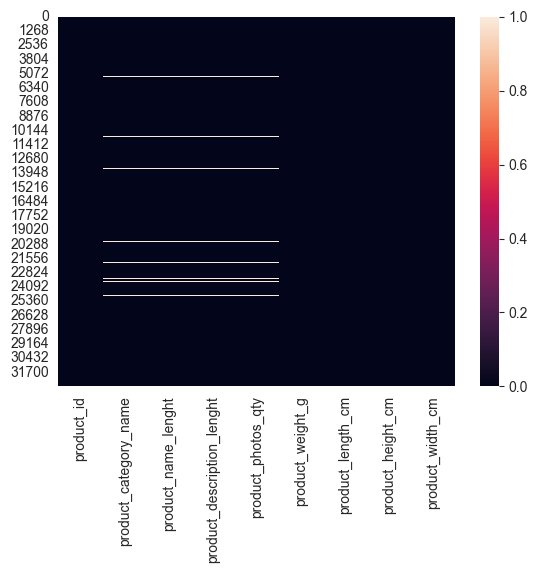

In [12]:
sns.heatmap(df.isnull())
plt.show()

In [13]:
## since the #["product_weight_g","product_length_cm","product_width_cm","product_height_cm"] columns has very small null value w which is <1% so we are going to delete then

In [14]:
df.shape

(32951, 9)

In [15]:
cols=["product_weight_g","product_length_cm","product_width_cm","product_height_cm"]

In [16]:
df=df.dropna(axis=0, how='any',subset=cols)

In [47]:
df.shape

(32949, 10)

In [59]:
df.isnull().sum()

product_id                      0
product_category_name         609
product_name_length           609
product_description_length    609
product_photos_qty            609
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
has_Unknown_category            0
dtype: int64

In [57]:
df=df.rename(columns={'product_name_lenght':'product_name_length','product_description_lenght':'product_description_length'},errors="raise")

In [58]:
df.join()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,has_Unknown_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,False
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,False
2,96bd76ec8810374ed1b65e291975717f,esporte lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,False
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,False
4,9dc1a7de274444849c219cff195d0b71,utilidades domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,False
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,False
32947,bf4538d88321d0fd4412a93c974510e6,construcao ferramentas iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,False
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama mesa banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,False
32949,83808703fc0706a22e264b9d75f04a2e,informatica acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,False


In [41]:
df['product_id'].nunique()
#No duplicate product_id

32949

In [19]:
df['product_category_name']=df['product_category_name'].str.lower().str.replace("_"," ")

In [20]:
df['product_category_name']=df['product_category_name'].astype('category')

In [21]:
df['product_category_name'].isnull().value_counts()

product_category_name
False    32340
True       609
Name: count, dtype: int64

In [22]:
df.dtypes

product_id                      object
product_category_name         category
product_name_lenght            float64
product_description_lenght     float64
product_photos_qty             float64
product_weight_g               float64
product_length_cm              float64
product_height_cm              float64
product_width_cm               float64
dtype: object

In [46]:
"""product_category_name      609
product_name_lenght           609
product_description_lenght    609
product_photos_qty            609 """

#above columns have null value percentage greather than 1  so we are going to keep then
# out of the 4 columns we only need product_category_name for our analysis so we are going to flag only this columns w

df['has_Unknown_category']=(df['product_category_name'].isnull())

In [24]:
""" we are keeeping the other 3 rows only because we might need then for
A/B Testing: "Does 50-char vs 100-char titles convert better?"
SEO Analysis: "Do longer descriptions rank higher?"
ML Features: Product similarity / recommendation systems"""

' we are keeeping the other 3 rows only because we might need then for\nA/B Testing: "Does 50-char vs 100-char titles convert better?"\nSEO Analysis: "Do longer descriptions rank higher?"\nML Features: Product similarity / recommendation systems'

In [25]:
df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340.000000,32340.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476592,771.492393,2.188961,2276.472488,30.815078,16.937661,23.196728
std,10.245699,635.124831,1.736787,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [48]:
df.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'has_Unknown_category'],
      dtype='object')

product_id
1e9e8ef04dbcff4541ed26657ea517e5    1
3aa071139cb16b67ca9e5dea641aaa2f    1
96bd76ec8810374ed1b65e291975717f    1
cef67bcfe19066a932b7673e239eb23d    1
9dc1a7de274444849c219cff195d0b71    1
                                   ..
a0b7d5a992ccda646f2d34e418fff5a0    1
bf4538d88321d0fd4412a93c974510e6    1
9a7c6041fa9592d9d9ef6cfe62a71f8c    1
83808703fc0706a22e264b9d75f04a2e    1
106392145fca363410d287a815be6de4    1
Name: count, Length: 32949, dtype: int64

In [ ]:
## joining two df for english product category name

In [178]:
translate_product_path="D:/DA project/sales-analytics-project/data/raw/product_category_name_translation.csv"

In [179]:
df_main=pd.read_csv(RAW_PATH,dtype={'product_category_name':'string'})

In [135]:
df_main.dtypes

product_id                            object
product_category_name         string[python]
product_name_lenght                  float64
product_description_lenght           float64
product_photos_qty                   float64
product_weight_g                     float64
product_length_cm                    float64
product_height_cm                    float64
product_width_cm                     float64
dtype: object

In [182]:
df_translation=pd.read_csv(translate_product_path,dtype={'product_category_name':'string','product_category_name_english':'string'})

In [183]:
df_translation.dtypes

product_category_name            string[python]
product_category_name_english    string[python]
dtype: object

In [151]:
df_result = df_main.merge(
    df_translation,
    on='product_category_name',
    how='left'
)


In [154]:
df_result.isnull().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

In [125]:
df_translation['product_category_name'].unique()

array(['beleza saude', 'informatica acessorios', 'automotivo',
       'cama mesa banho', 'moveis decoracao', 'esporte lazer',
       'perfumaria', 'utilidades domesticas', 'telefonia',
       'relogios presentes', 'alimentos bebidas', 'bebes', 'papelaria',
       'tablets impressao imagem', 'brinquedos', 'telefonia fixa',
       'ferramentas jardim', 'fashion bolsas e acessorios',
       'eletroportateis', 'consoles games', 'audio', 'fashion calcados',
       'cool stuff', 'malas acessorios', 'climatizacao',
       'construcao ferramentas construcao',
       'moveis cozinha area de servico jantar e jardim',
       'construcao ferramentas jardim', 'fashion roupa masculina',
       'pet shop', 'moveis escritorio', 'market place', 'eletronicos',
       'eletrodomesticos', 'artigos de festas', 'casa conforto',
       'construcao ferramentas ferramentas', 'agro industria e comercio',
       'moveis colchao e estofado', 'livros tecnicos', 'casa construcao',
       'instrumentos musicais', 'm

In [120]:
df_translation['product_category_name']=df_translation['product_category_name'].str.replace("_"," ")
df_main['product_category_name']=df_main['product_category_name'].str.replace("_"," ")

In [131]:
df_main

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao ferramentas iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama mesa banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [188]:
df_translation['product_category_name_english'].unique()

<StringArray>
[                          'health_beauty',
                   'computers_accessories',
                                    'auto',
                          'bed_bath_table',
                         'furniture_decor',
                          'sports_leisure',
                               'perfumery',
                              'housewares',
                               'telephony',
                           'watches_gifts',
                              'food_drink',
                                    'baby',
                              'stationery',
                  'tablets_printing_image',
                                    'toys',
                         'fixed_telephony',
                            'garden_tools',
                'fashion_bags_accessories',
                        'small_appliances',
                          'consoles_games',
                                   'audio',
                           'fashion_shoes',
                  

In [164]:
df['product_category_name'].unique()

array(['beleza saude', 'informatica acessorios', 'automotivo',
       'cama mesa banho', 'moveis decoracao', 'esporte lazer',
       'perfumaria', 'utilidades domesticas', 'telefonia',
       'relogios presentes', 'alimentos bebidas', 'bebes', 'papelaria',
       'tablets impressao imagem', 'brinquedos', 'telefonia fixa',
       'ferramentas jardim', 'fashion bolsas e acessorios',
       'eletroportateis', 'consoles games', 'audio', 'fashion calcados',
       'cool stuff', 'malas acessorios', 'climatizacao',
       'construcao ferramentas construcao',
       'moveis cozinha area de servico jantar e jardim',
       'construcao ferramentas jardim', 'fashion roupa masculina',
       'pet shop', 'moveis escritorio', 'market place', 'eletronicos',
       'eletrodomesticos', 'artigos de festas', 'casa conforto',
       'construcao ferramentas ferramentas', 'agro industria e comercio',
       'moveis colchao e estofado', 'livros tecnicos', 'casa construcao',
       'instrumentos musicais', 'm

In [130]:
print(df_main['product_category_name'].dtype)
print(df_translation['product_category_name'].dtype)


object
object


In [175]:
df_result['has_unnknown_flag']=(df['product_category_name'].isnull())
df_result['product_category_name']=df_result['has_unknown_flag']

In [166]:
df_result['product_category_name'].isnull().sum()

np.int64(0)

In [177]:
df_result['product_category_name']

0        False
1        False
2        False
3        False
4        False
         ...  
32946     True
32947     True
32948     True
32949     True
32950     True
Name: product_category_name, Length: 32951, dtype: object